<a href="https://colab.research.google.com/github/IaponaMother/Artificial_Neuron/blob/master/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('sample_data/страховка.csv')
data['sex'] = LabelEncoder().fit_transform(data['sex']) # 0 - women; 1 - men
data['smoker'] = LabelEncoder().fit_transform(data['smoker']) # 0 -yes; 1 - no
data['region'] = LabelEncoder().fit_transform(data['region'])
features = ['age','sex','bmi','children','smoker','region']
x = data[features].values
target = 'charges'
y = data[target].values
print(data)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [23]:
mean = x_train.mean(axis = 0)
std = x_train.std(axis = 0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std


In [25]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
history = model.fit(x_train,
                    y_train,
                    epochs = 1000,
                    validation_split = 0.1,
                    verbose = 2)


Epoch 1/1000
31/31 - 1s - loss: 325503808.0000 - mae: 13463.0215 - val_loss: 294489728.0000 - val_mae: 12276.6484 - 694ms/epoch - 22ms/step
Epoch 2/1000
31/31 - 0s - loss: 325229248.0000 - mae: 13454.0234 - val_loss: 293882368.0000 - val_mae: 12255.2422 - 89ms/epoch - 3ms/step
Epoch 3/1000
31/31 - 0s - loss: 323478240.0000 - mae: 13398.2002 - val_loss: 290413120.0000 - val_mae: 12139.1172 - 94ms/epoch - 3ms/step
Epoch 4/1000
31/31 - 0s - loss: 315428960.0000 - mae: 13155.5469 - val_loss: 277374880.0000 - val_mae: 11715.5225 - 79ms/epoch - 3ms/step
Epoch 5/1000
31/31 - 0s - loss: 290536672.0000 - mae: 12376.0625 - val_loss: 240656656.0000 - val_mae: 10502.1650 - 83ms/epoch - 3ms/step
Epoch 6/1000
31/31 - 0s - loss: 230816752.0000 - mae: 10446.1260 - val_loss: 167572976.0000 - val_mae: 8008.4185 - 88ms/epoch - 3ms/step
Epoch 7/1000
31/31 - 0s - loss: 134983088.0000 - mae: 7211.7251 - val_loss: 81193984.0000 - val_mae: 5329.1523 - 89ms/epoch - 3ms/step
Epoch 8/1000
31/31 - 0s - loss: 6226

In [26]:
scores = model.evaluate(x_test, y_test, verbose = 1)
print("Средняя абсолютная ошибка (mae) на тестовых данных:", round(scores[1], 4))

9/9 [==============================] - 0s 2ms/step - loss: 23133548.0000 - mae: 2731.8098
Средняя абсолютная ошибка (mae) на тестовых данных: 2731.8098


In [47]:
pred = model.predict(x_test).flatten()
test_index = 0
print("предсказанная стоимость страховки:", pred[test_index], ", правильная стоимость:", y_test[test_index])


предсказанная стоимость страховки: 9132.934 , правильная стоимость: 9095.06825


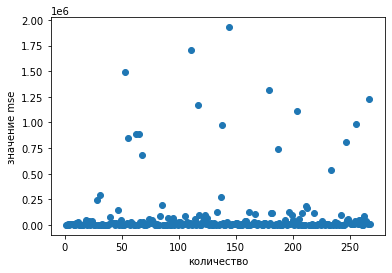

In [40]:
L = []
l = len(y_test)

for i in range(l):
  L.append(round((pred[i] - y_test[i]) ** 2 / l, 3))
l_ = [i for i in range(1, l + 1)] 

plt.scatter(l_, L)
plt.xlabel('количество')
plt.ylabel('значение mse')
plt.show()

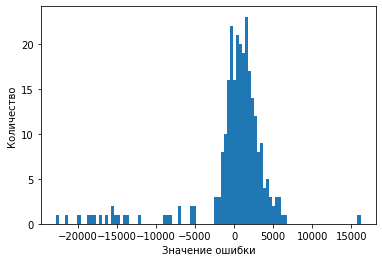

In [46]:
error = pred - y_test
plt.hist(error, bins = 100)
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()

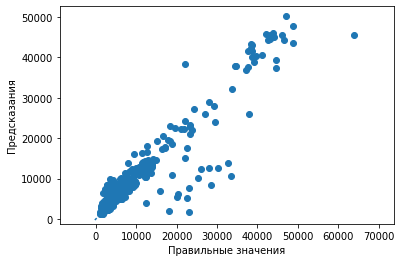

In [44]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значения')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()